In [21]:
import numpy as np
import pandas as pd
# from mnist import MNIST
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline


In [22]:
# mndata =  MNIST('')

In [23]:
# imgs, labels = mndata.load_training()

In [24]:
# train_data = pd.DataFrame(imgs)
# train_labels = pd.DataFrame(list(labels))

In [25]:
# imgs, labels = mndata.load_testing()
# test_data = pd.DataFrame(imgs)
# test_labels = pd.DataFrame(list(labels))

In [26]:
# train_data_subset = train_data.loc[:5999]
# train_labels_subset = train_labels.loc[:5999]
# test_data_subset = test_data.loc[:999]
# test_labels_subset = test_labels.loc[:999]

In [27]:
# train_data_subset = train_data_subset/255.0
# test_data_subset = test_data_subset/255.0
# train_data_subset = train_data_subset.round()
# test_data_subset = test_data_subset.round()

In [28]:
# train_data_subset.to_csv('mnist_train_data.csv', index=False, header=False)
# train_labels_subset.to_csv('mnist_train_labels.csv', index=False, header=False)
# test_data_subset.to_csv('mnist_test_data.csv', index=False, header=False)
# test_labels_subset.to_csv('mnist_test_labels.csv', index=False, header=False)

In [54]:
train_data = pd.read_csv('mnist_train_data.csv', header=None)
train_labels = pd.read_csv('mnist_train_labels.csv', names=['label'])
test_data = pd.read_csv('mnist_test_data.csv', header=None)
test_labels = pd.read_csv('mnist_test_labels.csv', names=['label'])

In [34]:
#Question 1
# 1 mark: correct answer
prior = train_labels.groupby(['label'])['label'].count().reset_index(drop=True)/6000

In [35]:
prior

0    0.098667
1    0.111833
2    0.096833
3    0.101333
4    0.103833
5    0.085667
6    0.101333
7    0.108500
8    0.091833
9    0.100167
Name: label, dtype: float64

In [36]:
#Question 2
# -1 mark: no laplace smoothing
# -1 mark: wrong answer, correct approach
# -3 marks: wrong approach, no answer

data = pd.concat([train_data, train_labels], axis=1)
num_data = data.groupby(['label']).sum().reset_index()
del num_data['label']
num_data = num_data+1

In [37]:
denom_data = data.groupby(['label'])['label'].count().reset_index(drop=True)
denom_data = denom_data + 2
likelihood = num_data.divide(denom_data, axis=0)

In [38]:
np.log(likelihood.max(axis=1))

0   -0.160343
1   -0.014970
2   -0.316098
3   -0.212950
4   -0.162990
5   -0.340745
6   -0.163484
7   -0.229673
8   -0.133273
9   -0.142336
dtype: float64

In [39]:
test_data_values = test_data.values.tolist()

In [40]:
likelihood_values = likelihood.values.tolist()

In [41]:
#Question 3
# -1 mark: wrong answer, correct approach
# -2 marks: wrong approach, no answer
pred = []
for i in range(0,1000):
    prob_list = []
    for cls in range(0,10):
        prob_val = np.log(prior.loc[cls])
        for j in range(0,784):
            prob_val += test_data_values[i][j]*np.log(likelihood_values[cls][j]) + (1-test_data_values[i][j])*np.log(1-likelihood_values[cls][j])
        prob_list.append(prob_val)
    pred.append(np.argmax(prob_list))
            

In [42]:
accuracy_score(test_labels, pred)

0.80900000000000005

In [43]:
#Question 4
# -1 mark: wrong answer, correct approach
# -2 marks: wrong approach, no answer

from sklearn.preprocessing import normalize
cnf_matrix = confusion_matrix(test_labels, pred)
print (cnf_matrix)
#cnf_matrix_norm = normalize(cnf_matrix,axis=1, norm='l1')
#print (np.around(cnf_matrix_norm,2))
#Answer: 4-9 (21),5-3 (11), 8-3 (9)

[[ 74   0   0   0   0   5   2   0   4   0]
 [  0 120   0   0   0   4   1   0   1   0]
 [  1   7  88   4   0   1   2   3   8   2]
 [  0   2   1  86   1   6   3   2   3   3]
 [  1   1   1   0  83   0   2   0   1  21]
 [  3   1   1  11   2  62   2   3   1   1]
 [  3   0   4   0   3   4  73   0   0   0]
 [  0   6   2   0   3   1   0  77   3   7]
 [  0   2   2   9   4   3   1   2  61   5]
 [  0   1   0   1   4   0   0   0   3  85]]


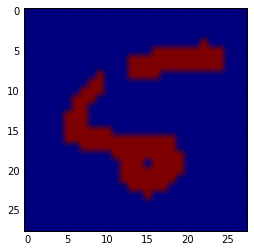

In [44]:
plt.imshow(np.reshape(test_data.loc[8], (28,28)))

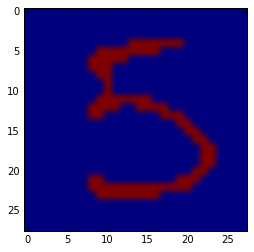

In [45]:
plt.imshow(np.reshape(test_data.loc[15], (28,28)))

GMM and LDA

In [46]:
from sklearn import datasets

bc_data = datasets.load_breast_cancer()

n = bc_data.data.shape[0]

train_data = bc_data.data[:int(0.4*n)]
val_data = bc_data.data[int(0.4*n):int(0.6*n)]
test_data = bc_data.data[int(0.6*n):]
train_labels = bc_data.target[:int(0.4*n)]
val_labels = bc_data.target[int(0.4*n):int(0.6*n)]
test_labels = bc_data.target[int(0.6*n):]

for cov in ['full', 'tied', 'diag', 'spherical']:
    estimator = GaussianMixture(n_components=2,
                   covariance_type=cov, random_state=0)

    estimator.means_init = np.array([train_data[train_labels == i].mean(axis=0)
                                for i in range(2)])
    estimator.fit(train_data, train_labels)
    pred = estimator.predict(val_data)
    print ('Validation accuracy for covariance type '+ cov + ' = ' + str(accuracy_score(val_labels, pred)))

Validation accuracy for covariance type full = 0.912280701754
Validation accuracy for covariance type tied = 0.859649122807
Validation accuracy for covariance type diag = 0.947368421053
Validation accuracy for covariance type spherical = 0.973684210526


In [47]:
# Best for diag

train_data = np.concatenate((train_data, val_data))
train_labels = np.concatenate((train_labels, val_labels))

estimator = GaussianMixture(n_components=2,
                covariance_type='spherical', random_state=0)

estimator.means_init = np.array([train_data[train_labels == i].mean(axis=0)
                            for i in range(2)])
estimator.fit(train_data, train_labels)
pred = estimator.predict(test_data)
print ('Test accuracy for covariance type '+ cov + ' = ' + str(accuracy_score(test_labels, pred)))

Test accuracy for covariance type spherical = 0.938596491228


In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Intialize
clf = LinearDiscriminantAnalysis()
# Train
clf.fit(train_data, train_labels)
# Test
pred = clf.predict(test_data)

print ('Test accuracy for covariance type '+ cov + ' = ' + str(accuracy_score(test_labels, pred)))

Test accuracy for covariance type spherical = 0.973684210526


In [55]:
clf.coef_

array([[-0.00539085, -0.00539085, -0.00539085, -0.00539085, -0.00539085,
        -0.00539085, -0.03836087, -0.03836087, -0.00539085, -0.00539085,
        -0.00539085, -0.00539085, -0.00539085, -0.00539085, -0.00539085,
        -0.00539085, -0.03836087, -0.03836087, -0.00539085, -0.00539085,
        -0.00539085, -0.00539085, -0.00539085, -0.00539085, -0.00539085,
        -0.00539085, -0.03836087, -0.03836087, -0.00539085, -0.00539085]])

In [56]:
clf.intercept_

array([-0.61694672])

In [73]:
#Crosscheck
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(train_data, train_labels)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [74]:
pred = clf.predict(test_data)

In [75]:
accuracy_score(test_labels, pred)

0.80900000000000005

In [76]:
clf.feature_log_prob_

array([[-6.38687932, -6.38687932, -6.38687932, ..., -6.38687932,
        -6.38687932, -6.38687932],
       [-6.51174533, -6.51174533, -6.51174533, ..., -6.51174533,
        -6.51174533, -6.51174533],
       [-6.36818719, -6.36818719, -6.36818719, ..., -6.36818719,
        -6.36818719, -6.36818719],
       ..., 
       [-6.48157713, -6.48157713, -6.48157713, ..., -6.48157713,
        -6.48157713, -6.48157713],
       [-6.315358  , -6.315358  , -6.315358  , ..., -6.315358  ,
        -6.315358  , -6.315358  ],
       [-6.4019172 , -6.4019172 , -6.4019172 , ..., -6.4019172 ,
        -6.4019172 , -6.4019172 ]])